# Interpreting ResNet Model With LIME

This notebook loads the a ResNet model and performs image classification on selected images. Explanations are generated and visualized using LIME algorithm, specifically the `LIMECVInterpreter` class.

In [1]:
import paddle
import interpretdl as it
!ln -s ../tutorials/assets assets

In [2]:
# load from paddle.vision
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

In [5]:
# Uncomment this block for loading a model from PaddleClas https://github.com/PaddlePaddle/PaddleClas, or a new designed model.
# !wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams -P assets/
# from assets.resnet import ResNet50
# paddle_model = ResNet50()
# MODEL_PATH = 'assets/ResNet50_pretrained.pdparams'
# paddle_model.set_dict(paddle.load(MODEL_PATH))

Initialize the `LIMECVInterpreter`. 

In [3]:
lime = it.LIMECVInterpreter(paddle_model, device='gpu:0')

Before interpreting the image, we first take a look at the original image.

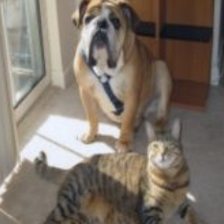

In [4]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let LIME method help us `interpret` the image with respect to the predicted label. The most important parts are painted green.

100%|██████████| 2000/2000 [00:13<00:00, 152.48it/s]


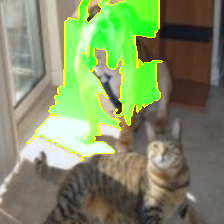

In [5]:
lime_weights = lime.interpret(
    'assets/catdog.png',
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

What if we `interpret` the image with respect to label "tiger cat"?

100%|██████████| 2000/2000 [00:12<00:00, 154.26it/s]


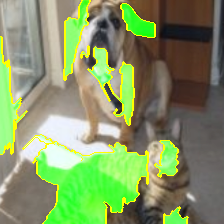

In [6]:
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    interpret_class=[282],
    visual=True,
    save_path=None)